<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Random%20Forest%20Classifier-%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Random Forest Classifier for Mushroom Classification

**"Can we accurately predict the edibility of a mushroom based solely on its physical characteristics?"**

<div align = "justify">
Mushroom hunting is both a hobby and a survival skill—but misidentification can be fatal. Despite years of field research, no simple rule has emerged to determine whether a mushroom is safe to eat. This project uses data from 23 species of gilled mushrooms described in the Audubon Society Field Guide to investigate whether machine learning, specifically a Random Forest Classifier, can distinguish between edible and poisonous mushrooms based on observable traits like cap shape, odor, and gill size.
</div>
<br>

Dataset Source: https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download

We aim to explore:

- How accurately can Random Forest Classifier classify mushroom edibility?

- Which features (e.g., odor, habitat, spore print color) are most indicative of poisonous mushrooms?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [3]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


 In the Mushroom Dataset, all features are categorical, and scikit-learn's RandomForestClassifier (and most ML models in sklearn) require numerical inputs. So, we need to encode every categorical column before training the model.

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
  df[col] = encoder.fit_transform(df[col])

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
# separate independent and dependent features
X = df.drop("class", axis = 1)
y = df["class"]

In [7]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [8]:
y.head()

,class
0,1
1,0
2,0
3,1
4,0


In [9]:
# training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
# model training
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(x_train, y_train)

# predictions
y_pred = classifier.predict(x_test)

In [11]:
# evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy Score:  1.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[843   0]
 [  0 782]]


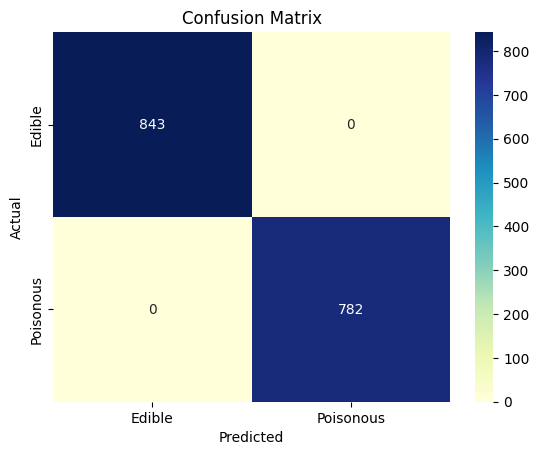

In [13]:
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<ipython-input-14-1459500259>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="viridis")


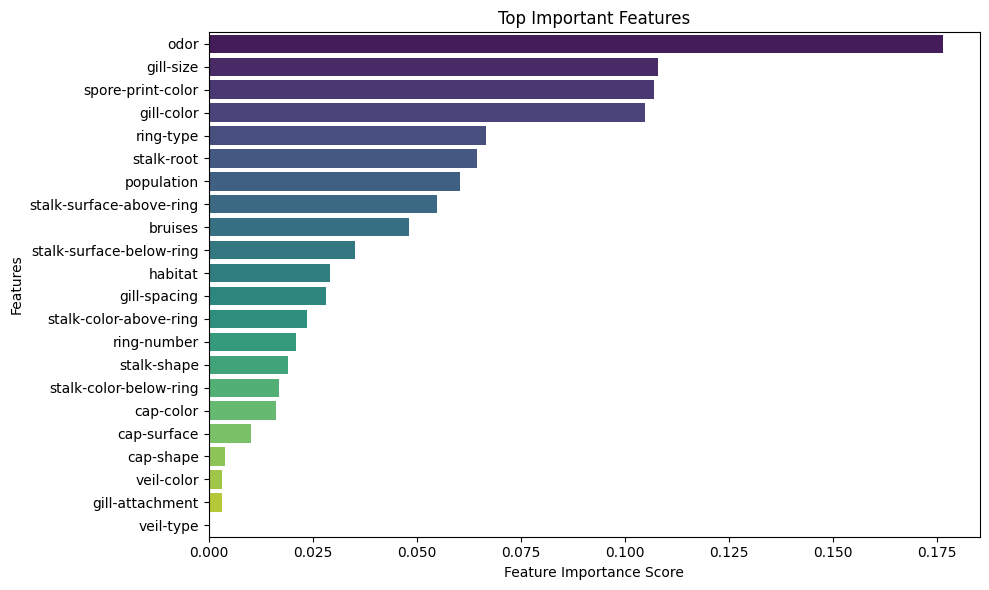

In [14]:
# Feature Importance
feat_importance = pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="viridis")
plt.title("Top Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()